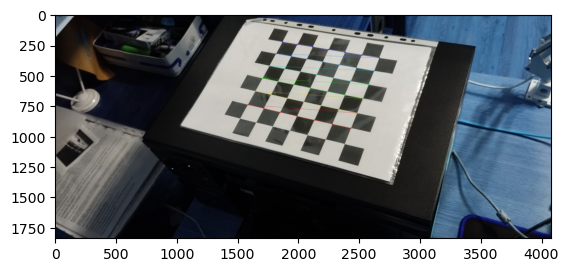

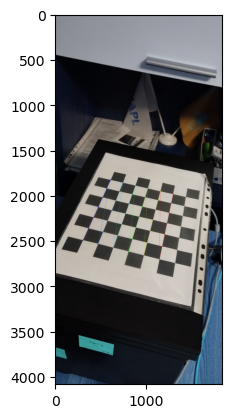

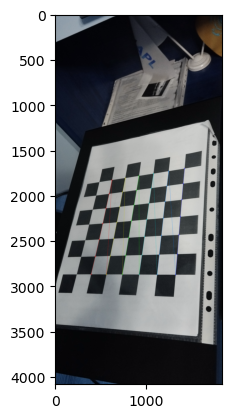

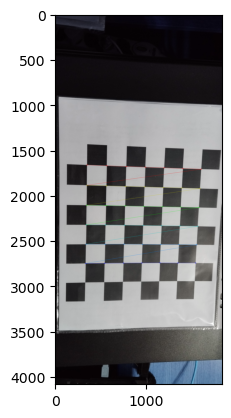

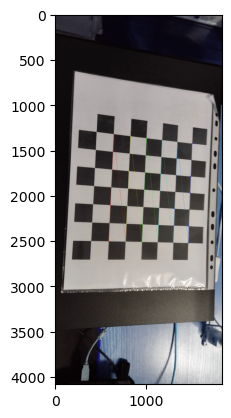

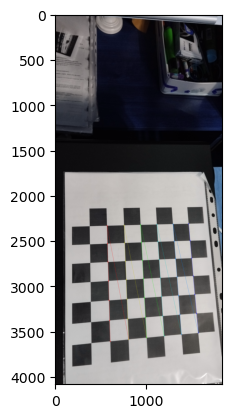

In [1]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import glob
 
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
images = glob.glob('*.jpg')
 
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        plt.imshow(img)
        plt.show()
        cv.waitKey(500)
 


In [2]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [3]:
print(dist)

[[ 0.13427791 -0.61224524  0.00206809 -0.00242003  0.518435  ]]


In [4]:
print(mtx)

[[3.33985604e+03 0.00000000e+00 9.53232654e+02]
 [0.00000000e+00 3.48557234e+03 2.03644204e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [5]:
print(rvecs)

(array([[-0.31320376],
       [ 0.41806099],
       [ 0.44286337]]), array([[-0.61554256],
       [-0.61106581],
       [-1.23493072]]), array([[-0.02875564],
       [ 0.7928212 ],
       [ 1.51774129]]), array([[ 0.16791979],
       [ 0.2213243 ],
       [-3.09967163]]), array([[-0.24999315],
       [-0.18653167],
       [ 1.61246045]]), array([[-0.34309943],
       [ 0.05984111],
       [ 1.52420475]]))


In [6]:
print(tvecs)

(array([[  6.95292143],
       [-13.17244487],
       [ 25.12005639]]), array([[-3.74756941],
       [ 2.55470629],
       [19.56793959]]), array([[ 2.48860692],
       [-1.6824518 ],
       [17.63982027]]), array([[ 2.98769934],
       [ 3.42328968],
       [16.93739418]]), array([[ 3.17267886],
       [-3.34059078],
       [19.22428693]]), array([[ 2.88865375],
       [ 1.48728016],
       [18.85157831]]))


In [14]:
# R = cv.Rodrigues(rvecs[0])[0]
t = [[mtx[0][0] * 0.06],[0.0],[0.0]]
# Rt = np.concatenate([R,t], axis=-1) # [R|t]
P = np.concatenate([mtx,t],axis=-1) # A[R|t]

In [15]:
print(P)

[[3.33985604e+03 0.00000000e+00 9.53232654e+02 2.00391362e+02]
 [0.00000000e+00 3.48557234e+03 2.03644204e+03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]


In [10]:
print(Rt)

[[  0.82168421  -0.47199907   0.31945569   6.95292143]
 [  0.34609896   0.85854822   0.37829944 -13.17244487]
 [ -0.45282509  -0.2002794    0.8688139   25.12005639]]


In [11]:
print(t)

[[  6.95292143]
 [-13.17244487]
 [ 25.12005639]]


In [ ]:
img = cv.imread('left12.jpg')
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [7]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
 
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.22505138841782532
